<a href="https://colab.research.google.com/github/sakunisgithub/machine_learning/blob/master/0010_Complete_Case_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

import pandas as pd

from matplotlib import pyplot as plt

In [ ]:
path1 = kagglehub.dataset_download('anandabiswas/data-science-job-dataset-with-missing-values')

print(f"{path1}/data_science_job.csv")

100%|██████████| 247k/247k [00:00<00:00, 63.9MB/s]

Extracting files...
/root/.cache/kagglehub/datasets/anandabiswas/data-science-job-dataset-with-missing-values/versions/1/data_science_job.csv


In [ ]:
df1 = pd.read_csv(f"{path1}/data_science_job.csv")

In [ ]:
df1.shape

(19158, 13)

In [ ]:
df1.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [ ]:
df1.isna().any()

,0
enrollee_id,False
city,False
city_development_index,True
gender,True
relevent_experience,False
enrolled_university,True
education_level,True
major_discipline,True
experience,True
company_size,True


$\textit{enrollee_id}$, $\textit{city}$, $\textit{relevant_experience}$, $\textit{target}$ do not have any missing value.

In [ ]:
df1.isna().mean()*100 # percentage of missing values per column

,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


We can remove rows having missing values in $\textit{city_development_index}$, $\textit{enrolled_university}$, $\textit{education_level}$, $\textit{experience}$, $\textit{training_hours}$, but not on $\textit{gender}$, $\textit{major_discipline}$, $\textit{company_size}$, $\textit{company_type}$ as the later ones have more than $5\%$ values missing.

In [ ]:
# columns with missing values but less than 5%
columns = [names for names in df1.columns if df1[names].isna().mean()*100 < 5 and df1[names].isna().mean()*100 > 0]

print(columns)

['city_development_index', 'enrolled_university', 'education_level', 'experience', 'training_hours']


In [ ]:
df1[columns].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
3229,0.920,Part time course,Masters,20.0,9.0
299,0.579,no_enrollment,Graduate,4.0,320.0
3491,0.910,no_enrollment,Masters,20.0,28.0
7384,0.624,Full time course,Graduate,1.0,162.0
15174,0.920,no_enrollment,Graduate,20.0,18.0


In [ ]:
df1[columns].dropna().shape[0] / df1.shape[0]

0.8968577095730244

This means we will be left with $89\%$ data if we drop the rows having any NA values in the columns selected above.

In [ ]:
new_df1 = df1.dropna(subset = columns) # drops the rows having NA values in selected columns

print(new_df1.shape)

(17182, 13)


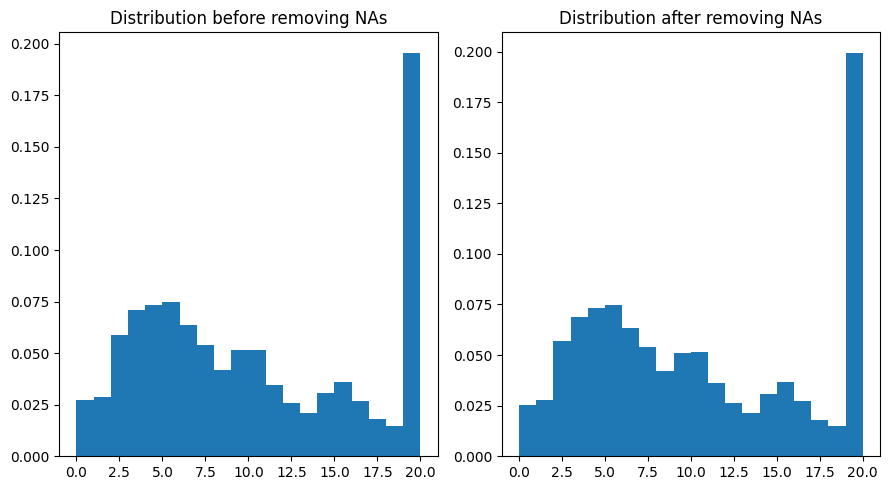

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (9, 5))

axes[0].hist(df1['experience'], bins = 20, density = True)
axes[0].set_title('Distribution before removing NAs')

axes[1].hist(new_df1['experience'], bins = 20, density = True)
axes[1].set_title('Distribution after removing NAs')

plt.tight_layout()

plt.show()

The two histograms are idenctical. This implies missing data were completely at random and removing them has not changed the distribution of the variable.

We can do similar check for other numeric variables.

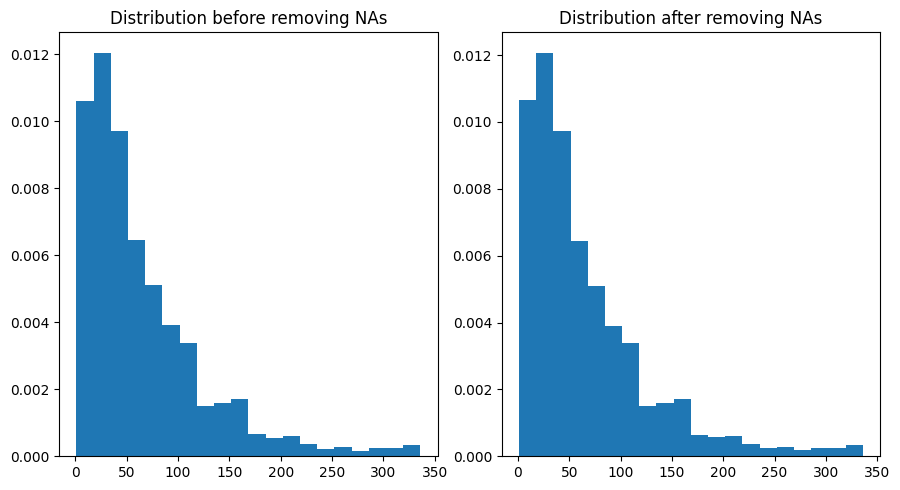

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (9, 5))

axes[0].hist(df1['training_hours'], bins = 20, density = True)
axes[0].set_title('Distribution before removing NAs')

axes[1].hist(new_df1['training_hours'], bins = 20, density = True)
axes[1].set_title('Distribution after removing NAs')

plt.tight_layout()

plt.show()

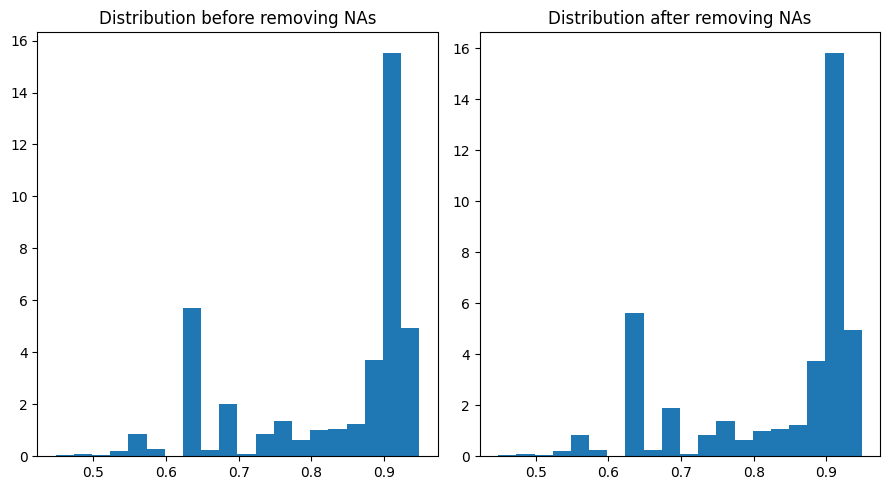

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (9, 5))

axes[0].hist(df1['city_development_index'], bins = 20, density = True)
axes[0].set_title('Distribution before removing NAs')

axes[1].hist(new_df1['city_development_index'], bins = 20, density = True)
axes[1].set_title('Distribution after removing NAs')

plt.tight_layout()

plt.show()

For categorical variables, we check the ratios of the categories.

In [ ]:
enrolled_university_check = pd.concat([
    df1['enrolled_university'].value_counts() / df1.shape[0],

    new_df1['enrolled_university'].value_counts() / new_df1.shape[0]
], axis = 1)

enrolled_university_check.columns = ['before', 'after']

enrolled_university_check

,before,after
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


All the changes are negligible.

In [ ]:
education_level_check = pd.concat([
    df1['education_level'].value_counts() / df1.shape[0],

    new_df1['education_level'].value_counts() / new_df1.shape[0]
], axis = 1)

education_level_check.columns = ['before', 'after']

education_level_check

,before,after
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


Here also the changes are negligible.